In [1]:
import csv
from statistics import mean 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from scipy.stats import spearmanr, pearsonr
from sklearn.ensemble import RandomForestRegressor

In [118]:
def metrics_print(test_y, test_y_hat):
    r2 = r2_score(test_y, test_y_hat)
    print("R2 ", r2)
    # MAE
    print("MAE of simple linear regression", metrics.mean_absolute_error(test_y,test_y_hat))

    #MSE
    print("MSE of simple linear regression", mean_squared_error(test_y, test_y_hat))

    #RMSE
    print("RMSE of simple linear regression", np.sqrt(mean_squared_error(test_y, test_y_hat)))


    return

In [119]:
import pwlf

In [120]:
lc2 = pd.read_csv("Feb15/LC2_18Jan.csv")

/home/jayati/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (5,7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [121]:
lc2

,created_at,PM10_2,PM2.5_2,RH_2,Temp_2,CO_2,NO2_2,NH3_2
0,2020-10-09 11:52:30 IST,57.1,51.5,75.02,27.98,1.28,0.32,0.11
1,2020-10-09 11:53:00 IST,57.5,51.6,74.86,27.99,1.23,0.33,0.11
2,2020-10-09 11:53:30 IST,59.2,53.2,74.89,27.98,1.17,0.35,0.1
3,2020-10-09 11:54:00 IST,57.5,51.8,74.86,27.96,1.17,0.36,0.09
4,2020-10-09 11:54:30 IST,58.3,52.6,74.86,27.94,1.11,0.37,0.09
...,...,...,...,...,...,...,...,...
269859,2021-01-18 18:57:30 IST,39.7,36.3,44.32,30.05,0.48,4.87,0.01
269860,2021-01-18 18:58:00 IST,39.0,35.8,44.35,30.04,0.48,4.87,0.01
269861,2021-01-18 18:58:30 IST,40.1,36.7,44.35,30.03,0.48,4.87,0.01
269862,2021-01-18 18:59:00 IST,39.4,36.2,44.35,30.04,0.48,4.83,0.02


In [122]:
lc2['created_at'] = lc2['created_at'].astype(str).str[:-4]
lc2['created_at'] = pd.to_datetime(lc2['created_at'])

In [123]:
lc2

,created_at,PM10_2,PM2.5_2,RH_2,Temp_2,CO_2,NO2_2,NH3_2
0,2020-10-09 11:52:30,57.1,51.5,75.02,27.98,1.28,0.32,0.11
1,2020-10-09 11:53:00,57.5,51.6,74.86,27.99,1.23,0.33,0.11
2,2020-10-09 11:53:30,59.2,53.2,74.89,27.98,1.17,0.35,0.1
3,2020-10-09 11:54:00,57.5,51.8,74.86,27.96,1.17,0.36,0.09
4,2020-10-09 11:54:30,58.3,52.6,74.86,27.94,1.11,0.37,0.09
...,...,...,...,...,...,...,...,...
269859,2021-01-18 18:57:30,39.7,36.3,44.32,30.05,0.48,4.87,0.01
269860,2021-01-18 18:58:00,39.0,35.8,44.35,30.04,0.48,4.87,0.01
269861,2021-01-18 18:58:30,40.1,36.7,44.35,30.03,0.48,4.87,0.01
269862,2021-01-18 18:59:00,39.4,36.2,44.35,30.04,0.48,4.83,0.02


In [124]:
cpcb = pd.read_csv("Air_pollution/Air-Pollution/Data/Airveda&cpcb_15min.csv")

In [125]:
cpcb['created_at'] = pd.to_datetime(cpcb['created_at'], dayfirst = True)

In [126]:
cpcb

,Unnamed: 0,created_at,air_pm25,air_pm10,cpcb_pm25,cpcb_pm10
0,0,2020-11-01 00:00:00,82.0,127.0,73,172
1,1,2020-11-01 00:15:00,83.0,125.0,73,172
2,2,2020-11-01 00:30:00,76.0,117.0,73,172
3,3,2020-11-01 01:00:00,81.0,120.5,80,158
4,4,2020-11-01 01:15:00,83.0,118.0,80,158
...,...,...,...,...,...,...
2703,2703,2020-12-06 00:45:00,61.0,103.0,52,109
2704,2704,2020-12-07 11:15:00,57.0,95.0,34,85
2705,2705,2020-12-07 11:30:00,49.0,84.0,34,85
2706,2706,2020-12-07 11:45:00,49.0,81.0,33,84


In [127]:
comb = pd.merge(cpcb, lc2,  
                   on='created_at',  
                   how='inner') 

In [128]:
comb

,Unnamed: 0,created_at,air_pm25,air_pm10,cpcb_pm25,cpcb_pm10,PM10_2,PM2.5_2,RH_2,Temp_2,CO_2,NO2_2,NH3_2
0,0,2020-11-01 00:00:00,82.0,127.0,73,172,62.7,56.6,47.11,28.93,1,3.14,0.1
1,1,2020-11-01 00:15:00,83.0,125.0,73,172,61.3,55.4,48.89,28.94,1,2.60,0.11
2,2,2020-11-01 00:30:00,76.0,117.0,73,172,59.4,53.8,48.96,28.71,1.06,2.33,0.13
3,3,2020-11-01 01:00:00,81.0,120.5,80,158,60.7,54.9,50.21,28.45,1.11,1.91,0.15
4,4,2020-11-01 01:15:00,83.0,118.0,80,158,56.3,50.7,51.74,28.34,1.17,1.51,0.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2594,2677,2020-12-05 17:45:00,40.0,86.0,37,106,26.4,22.2,40.15,26.75,0.44,9.78,0.01
2595,2681,2020-12-05 18:45:00,48.0,95.0,51,148,33.6,27.6,46.78,24.73,0.44,6.08,0.02
2596,2705,2020-12-07 11:30:00,49.0,84.0,34,85,28.1,25.5,47.29,30.51,0.58,1.88,0.11
2597,2706,2020-12-07 11:45:00,49.0,81.0,33,84,27.1,24.7,43.79,31.61,0.53,2.48,0.08


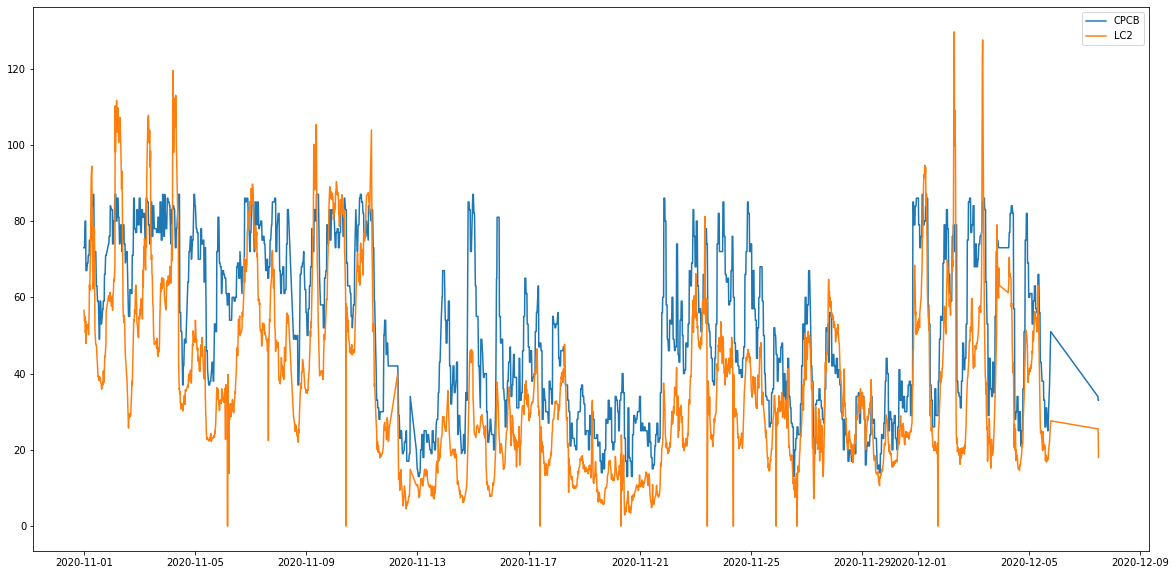

In [129]:
plt.figure(figsize=(20, 10))
plt.plot(comb.created_at, comb.cpcb_pm25)
plt.plot(comb.created_at, comb['PM2.5_2'])
plt.legend(["CPCB", "LC2"])

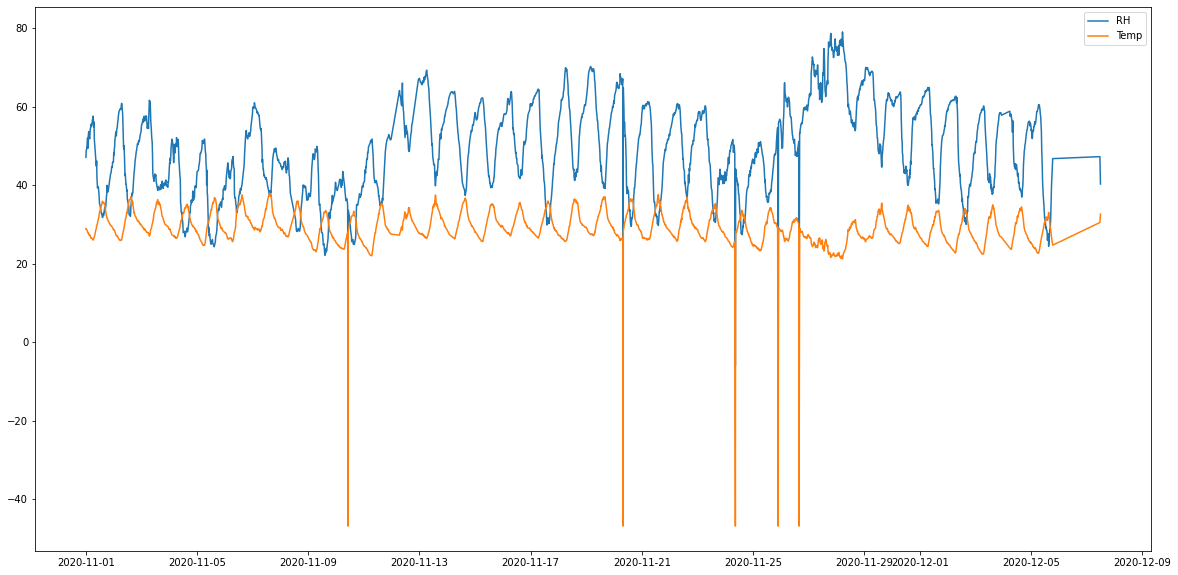

In [53]:
plt.figure(figsize=(20, 10))
plt.plot(comb.created_at, comb['RH_2'])
plt.plot(comb.created_at, comb['Temp_2'])
plt.legend(["RH", "Temp"])

In [131]:
comb = comb[comb['Temp_2'] >= 0]

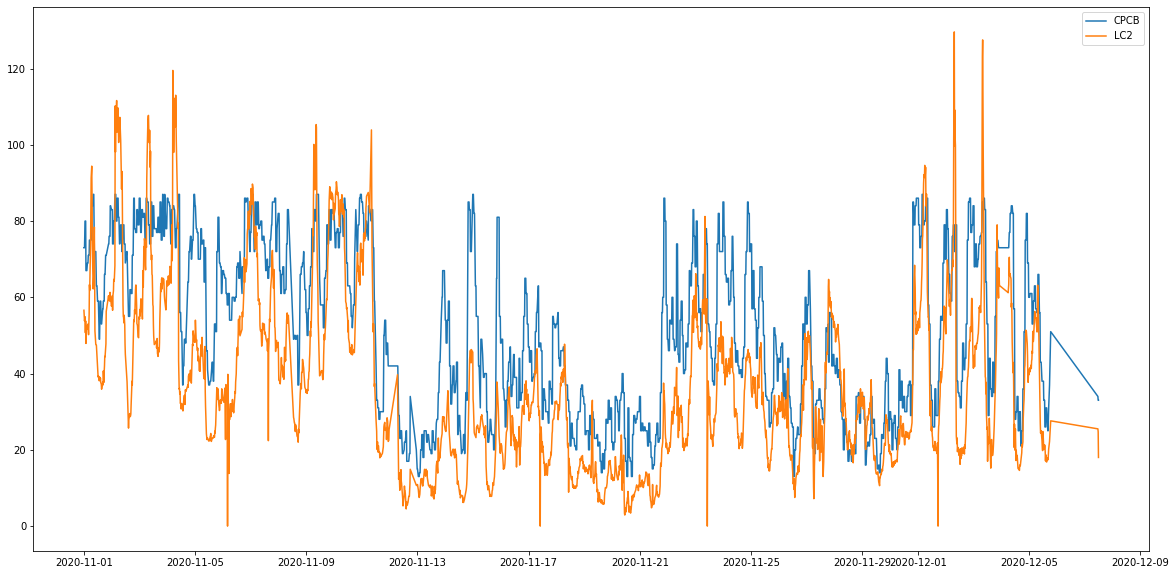

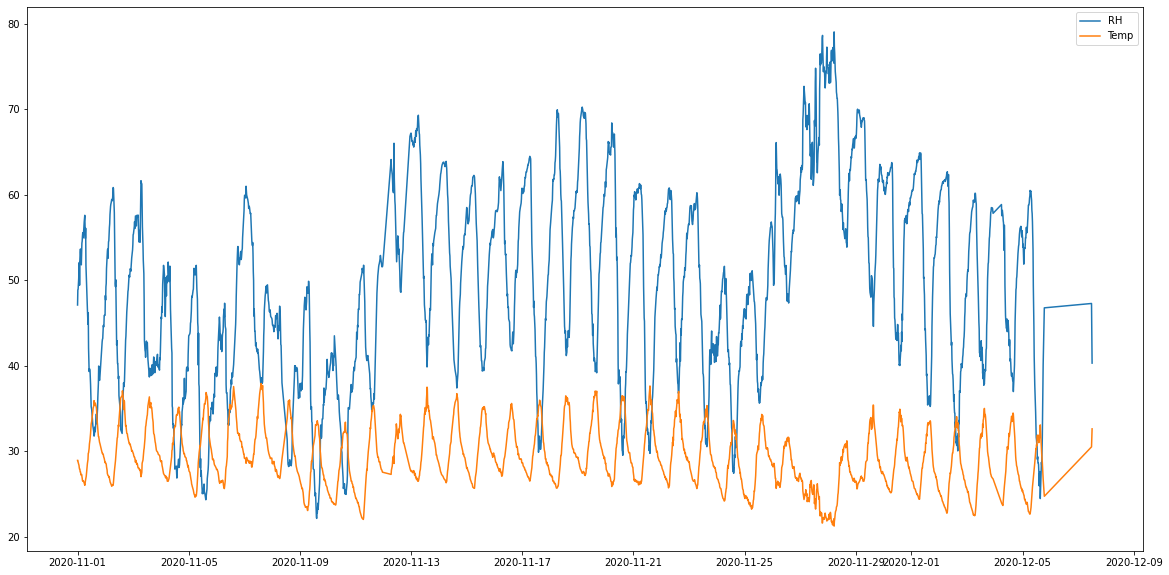

In [132]:
plt.figure(figsize=(20, 10))
plt.plot(comb.created_at, comb.cpcb_pm25)
plt.plot(comb.created_at, comb['PM2.5_2'])
plt.legend(["CPCB", "LC2"])
plt.show()

plt.figure(figsize=(20, 10))
plt.plot(comb.created_at, comb['RH_2'])
plt.plot(comb.created_at, comb['Temp_2'])
plt.legend(["RH", "Temp"])

R2  0.779271073113308
MAE of simple linear regression 7.5258502585446285
MSE of simple linear regression 104.79706659873715
RMSE of simple linear regression 10.237043840813477


/usr/local/lib/python3.8/dist-packages/pwlf/pwlf.py:1108: RuntimeWarning: invalid value encountered in double_scalars
  self.slopes[i] = (y_hat[i+1]-y_hat[i]) / \


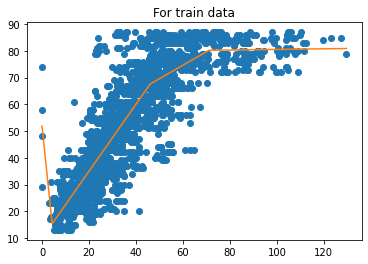

R2  0.7852753263482368
MAE of simple linear regression 7.6092641773250245
MSE of simple linear regression 99.03587561600301
RMSE of simple linear regression 9.951677025305987


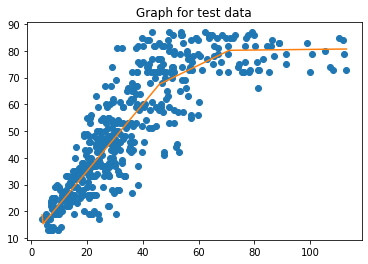

In [117]:
df = comb
df = df[df['created_at'] >= '2020-11-01 00:00:00']
df

msk = (np.random.rand(len(df)) < 0.8)
train = df[msk]
test = df[~msk]
train_x = np.asanyarray(train['PM2.5_2'])
train_y = np.asanyarray(train['cpcb_pm25'])
test_x = np.asanyarray(test['PM2.5_2'])
test_y = np.asanyarray(test['cpcb_pm25'])
x, y = train_x, train_y
my_pwlf = pwlf.PiecewiseLinFit(x, y)

# # fit the data for four line segments
res = my_pwlf.fit(4)
# res = my_pwlf.fitfast(4, pop=3)
# # predict for the determined points
train_y_hat = my_pwlf.predict(train_x)
xHat = np.linspace(min(x), max(x), num=10000)
yHat = my_pwlf.predict(xHat)
metrics_print(train_y, train_y_hat)

# # plot the results
plt.figure()
plt.plot(x, y, 'o')
plt.plot(xHat, yHat, '-')
plt.title("For train data")
plt.show()
test_y_hat = my_pwlf.predict(test_x)
metrics_print(test_y, test_y_hat) 
# spearman = spearmanr(test_y, test_y_hat)
# spearman1 = spearmanr(train_x, train_y)
# print(f'Test data Spearman correlation of Piecewise linear regression: {spearman[0]:.3}')
# print(f'Train data Spearman correlation of Piecewise linear regression: {spearman1[0]:.3}')
xHat = np.linspace(min(test_x), max(test_x), num=10000)
yHat = my_pwlf.predict(xHat)
# # plot the results

plt.figure()
plt.plot(test_x, test_y, 'o')
plt.plot(xHat, yHat, '-')
plt.title("Graph for test data")
plt.show()

In [68]:

msk = (np.random.rand(len(df)) < 0.8)
train = df[msk]
test = df[~msk]
train_x = np.asanyarray(train['PM2.5_2'])
train_y = np.asanyarray(train['cpcb_pm25'])
test_x = np.asanyarray(test['PM2.5_2'])
test_y = np.asanyarray(test['cpcb_pm25'])
x, y = train_x, train_y
my_pwlf = pwlf.PiecewiseLinFit(x, y)

# # fit the data for four line segments
res = my_pwlf.fit(4)
# res = my_pwlf.fitfast(4, pop=3)

/usr/local/lib/python3.8/dist-packages/pwlf/pwlf.py:1108: RuntimeWarning: invalid value encountered in double_scalars
  self.slopes[i] = (y_hat[i+1]-y_hat[i]) / \


R2  0.7775956966643385
MAE of simple linear regression 7.586423640492114
MSE of simple linear regression 104.9850483999427
RMSE of simple linear regression 10.246221176606657


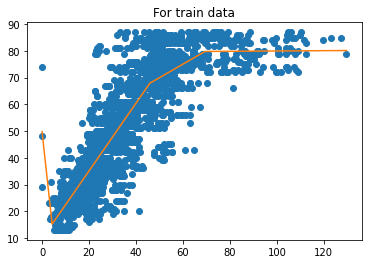

In [69]:
# # predict for the determined points
train_y_hat = my_pwlf.predict(train_x)
xHat = np.linspace(min(x), max(x), num=10000)
yHat = my_pwlf.predict(xHat)
metrics_print(train_y, train_y_hat)

# # plot the results
plt.figure()
plt.plot(x, y, 'o')
plt.plot(xHat, yHat, '-')
plt.title("For train data")
plt.show()

R2  0.7915479745511482
MAE of simple linear regression 7.306870390071623
MSE of simple linear regression 98.5996103655433
RMSE of simple linear regression 9.92973365028203


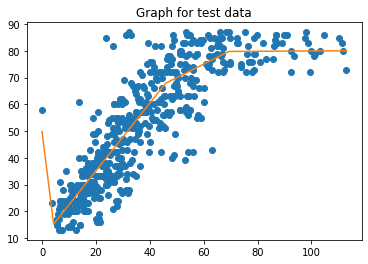

In [70]:
test_y_hat = my_pwlf.predict(test_x)
metrics_print(test_y, test_y_hat) 
# spearman = spearmanr(test_y, test_y_hat)
# spearman1 = spearmanr(train_x, train_y)
# print(f'Test data Spearman correlation of Piecewise linear regression: {spearman[0]:.3}')
# print(f'Train data Spearman correlation of Piecewise linear regression: {spearman1[0]:.3}')
xHat = np.linspace(min(test_x), max(test_x), num=10000)
yHat = my_pwlf.predict(xHat)
# # plot the results

plt.figure()
plt.plot(test_x, test_y, 'o')
plt.plot(xHat, yHat, '-')
plt.title("Graph for test data")
plt.show()

In [71]:
PieceWise_Test_x = test_x
PieceWise_Test_y = test_y
PieceWise_Test_y_hat = test_y_hat

In [72]:
train_x = np.asanyarray(train[['PM2.5_2']])
train_y = np.asanyarray(train[['cpcb_pm25']])

test_x = np.asanyarray(test[['PM2.5_2']])
test_y = np.asanyarray(test[['cpcb_pm25']])
regr = linear_model.LinearRegression()
regr.fit (train_x, train_y)
test_y_hat = regr.predict(test_x)
metrics_print(test_y, test_y_hat)
Linear_test_x = test_x
Linear_test_y = test_y
Linear_test_y_hat = test_y_hat


from sklearn.metrics import r2_score
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(train_x, train_y.ravel()) 
y_pred = regressor.predict(test_x)

metrics_print(test_y, y_pred)

Random_test_x = test_x
Random_test_y = test_y
Random_test_y_hat = y_pred



R2  0.6995129846931245
MAE of simple linear regression 9.389352661855028
MSE of simple linear regression 142.1329563258805
RMSE of simple linear regression 11.921952706074643
R2  0.7415162241223706
MAE of simple linear regression 8.338956043365494
MSE of simple linear regression 122.26506090535604
RMSE of simple linear regression 11.057353250455375


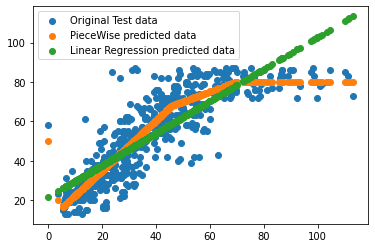

In [73]:
plt.scatter(PieceWise_Test_x, PieceWise_Test_y)

plt.scatter(PieceWise_Test_x, PieceWise_Test_y_hat)
plt.scatter(Linear_test_x, Linear_test_y_hat)
plt.legend(["Original Test data","PieceWise predicted data", "Linear Regression predicted data"])



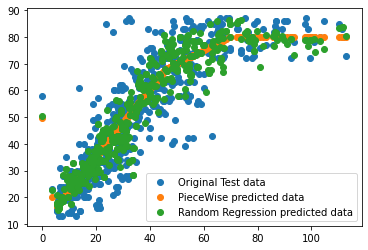

In [74]:
plt.scatter(PieceWise_Test_x, PieceWise_Test_y)
plt.scatter(PieceWise_Test_x, PieceWise_Test_y_hat)
plt.scatter(Random_test_x, Random_test_y_hat)
plt.legend(["Original Test data","PieceWise predicted data", "Random Regression predicted data"])

In [130]:
from mlinsights.mlmodel import PiecewiseRegressor
from sklearn.tree import DecisionTreeRegressor

train_x = np.asanyarray(train[['lc2_pm25', 'lc2_pm10']])
train_y = np.asanyarray(train[['cpcb_pm25']])

test_x = np.asanyarray(test[['lc2_pm25', 'lc2_pm10']])
test_y = np.asanyarray(test[['cpcb_pm25']])
model = PiecewiseRegressor(verbose=True,
                           binner=DecisionTreeRegressor(min_samples_leaf=300))
model.fit(train_x, train_y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s finished


PiecewiseRegressor(binner=DecisionTreeRegressor(min_samples_leaf=300),
                   estimator=LinearRegression(), verbose=True)

In [132]:
pred = model.predict(train_x)

TypeError: NumPy boolean array indexing assignment requires a 0 or 1-dimensional input, input has 2 dimensions

In [136]:
#5, 45, 70
msk = (np.random.rand(len(df)) < 0.8)
train = df[msk]
test = df[~msk]

In [137]:
train_1 = train[train['PM2.5_2'] < 5]
train_2 = train[(train['PM2.5_2'] < 45) & (train['PM2.5_2'] >= 5)]
train_3 = train[(train['PM2.5_2'] < 70) & (train['PM2.5_2'] >= 45)]
train_4 = train[train['PM2.5_2'] >= 70]

test_1 = test[test['PM2.5_2'] < 5]
test_2 = test[(test['PM2.5_2'] < 45) & (test['PM2.5_2'] >= 5)]
test_3 = test[(test['PM2.5_2'] < 70) & (test['PM2.5_2'] >= 45)]
test_4 = test[test['PM2.5_2'] >= 70]


****************** <5 ******************* 
R2  0.04094522656030841
MAE of simple linear regression 4.0523282832977054
MSE of simple linear regression 21.647236314781612
RMSE of simple linear regression 4.652659058514992
****************** <45 ******************* 
R2  0.6223493419283186
MAE of simple linear regression 7.164955985449926
MSE of simple linear regression 99.65343905782711
RMSE of simple linear regression 9.982656913759339
****************** <70 ******************* 
R2  0.006697248277154677
MAE of simple linear regression 9.347703713252857
MSE of simple linear regression 153.19732025003665
RMSE of simple linear regression 12.377290505196873
****************** >70 ******************* 
R2  -0.06658120553132951
MAE of simple linear regression 4.42306672413142
MSE of simple linear regression 25.89059215101957
RMSE of simple linear regression 5.088279881356721


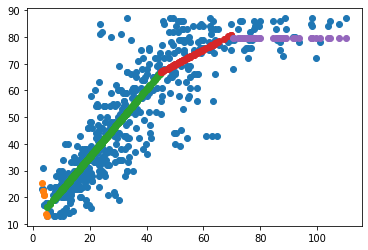

R2  0.7087438850735126
MAE of simple linear regression 9.487251968180209
MSE of simple linear regression 139.52542024668764
RMSE of simple linear regression 11.81208788685081
R2  0.7300953186503649
MAE of simple linear regression 8.27810188492226
MSE of simple linear regression 129.2970762222833
RMSE of simple linear regression 11.370887222300787


<ipython-input-138-a327b84dde73>:66: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(train_x, train_y)


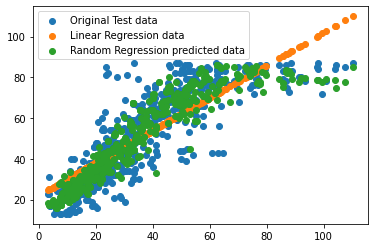

In [138]:
train_x = train[['PM2.5_2']]
train_y = train[['cpcb_pm25']]
test_x = test[['PM2.5_2']]
test_y = test[['cpcb_pm25']]

train_x_1 = train_1[['PM2.5_2']]
train_y_1 = train_1[['cpcb_pm25']]
train_x_2 = train_2[['PM2.5_2']]
train_y_2 = train_2[['cpcb_pm25']]
train_x_3 = train_3[['PM2.5_2']]
train_y_3 = train_3[['cpcb_pm25']]
train_x_4 = train_4[['PM2.5_2']]
train_y_4 = train_4[['cpcb_pm25']]

test_x_1 = test_1[['PM2.5_2']]
test_y_1 = test_1[['cpcb_pm25']]
test_x_2 = test_2[['PM2.5_2']]
test_y_2 = test_2[['cpcb_pm25']]
test_x_3 = test_3[['PM2.5_2']]
test_y_3 = test_3[['cpcb_pm25']]
test_x_4 = test_4[['PM2.5_2']]
test_y_4 = test_4[['cpcb_pm25']]
print("****************** <5 ******************* ")
regr_1 = linear_model.LinearRegression()
regr_1.fit (train_x_1, train_y_1)
test_y_hat_1 = regr_1.predict(test_x_1)
metrics_print(test_y_1, test_y_hat_1)

print("****************** <45 ******************* ")
regr_2 = linear_model.LinearRegression()
regr_2.fit (train_x_2, train_y_2)
test_y_hat_2 = regr_2.predict(test_x_2)
metrics_print(test_y_2, test_y_hat_2)

print("****************** <70 ******************* ")
regr_3 = linear_model.LinearRegression()
regr_3.fit (train_x_3, train_y_3)
test_y_hat_3 = regr_3.predict(test_x_3)
metrics_print(test_y_3, test_y_hat_3)

print("****************** >70 ******************* ")
regr_4 = linear_model.LinearRegression()
regr_4.fit (train_x_4, train_y_4)
test_y_hat_4 = regr_4.predict(test_x_4)
metrics_print(test_y_4, test_y_hat_4)

plt.scatter(test_x['PM2.5_2'], test_y)
plt.scatter(test_x_1['PM2.5_2'], test_y_hat_1)
plt.scatter(test_x_2['PM2.5_2'], test_y_hat_2)
plt.scatter(test_x_3['PM2.5_2'], test_y_hat_3)
plt.scatter(test_x_4['PM2.5_2'], test_y_hat_4)
plt.show()
regr = linear_model.LinearRegression()
regr.fit (train_x, train_y)
test_y_hat = regr.predict(test_x)
metrics_print(test_y, test_y_hat)
Linear_test_x = test_x
Linear_test_y = test_y
Linear_test_y_hat = test_y_hat


from sklearn.metrics import r2_score
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(train_x, train_y) 
y_pred = regressor.predict(test_x)

metrics_print(test_y, y_pred)

Random_test_x = test_x
Random_test_y = test_y
Random_test_y_hat = y_pred

plt.scatter(test_x, test_y)
plt.scatter(Linear_test_x, Linear_test_y_hat)
plt.scatter(Random_test_x, Random_test_y_hat)

plt.legend(["Original Test data","Linear Regression data", "Random Regression predicted data"])



****************** <5 ******************* 
R2  -0.4090376684824799
MAE of simple linear regression 4.738727159360764
MSE of simple linear regression 30.99882870661456
RMSE of simple linear regression 5.567659176585305
****************** <45 ******************* 
R2  0.6743186415906263
MAE of simple linear regression 7.08388470684856
MSE of simple linear regression 96.10363528909532
RMSE of simple linear regression 9.803246160792623
****************** <70 ******************* 
R2  0.04239299004749264
MAE of simple linear regression 8.131021477429048
MSE of simple linear regression 121.16577523914081
RMSE of simple linear regression 11.007532659008595
****************** >70 ******************* 
R2  -0.07130403806204066
MAE of simple linear regression 4.1728580121892245
MSE of simple linear regression 27.190363734204396
RMSE of simple linear regression 5.214438007513791


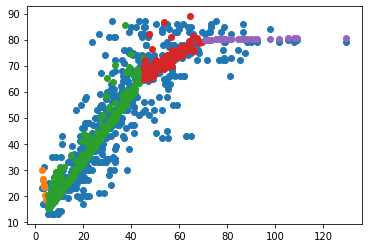

R2  0.6884590101084798
MAE of simple linear regression 9.08536669486562
MSE of simple linear regression 139.4451520220319
RMSE of simple linear regression 11.808689682688419
R2  0.9496180655800668
MAE of simple linear regression 3.2988176352705407
MSE of simple linear regression 22.550857615230456
RMSE of simple linear regression 4.7487743276797705


<ipython-input-111-cccd28a62dd7>:67: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(train_x, train_y)


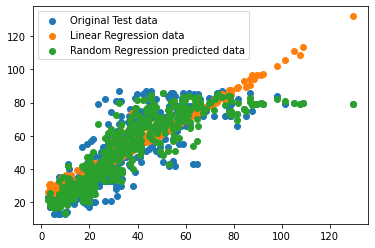

In [111]:
train_x = test[['PM2.5_2', 'PM10_2']]
train_y = test[['cpcb_pm25']]
test_x = test[['PM2.5_2', 'PM10_2']]
test_y = test[['cpcb_pm25']]

train_x_1 = train_1[['PM2.5_2', 'PM10_2']]
train_y_1 = train_1[['cpcb_pm25']]
train_x_2 = train_2[['PM2.5_2', 'PM10_2']]
train_y_2 = train_2[['cpcb_pm25']]
train_x_3 = train_3[['PM2.5_2', 'PM10_2']]
train_y_3 = train_3[['cpcb_pm25']]
train_x_4 = train_4[['PM2.5_2', 'PM10_2']]
train_y_4 = train_4[['cpcb_pm25']]

test_x_1 = test_1[['PM2.5_2', 'PM10_2']]
test_y_1 = test_1[['cpcb_pm25']]
test_x_2 = test_2[['PM2.5_2', 'PM10_2']]
test_y_2 = test_2[['cpcb_pm25']]
test_x_3 = test_3[['PM2.5_2', 'PM10_2']]
test_y_3 = test_3[['cpcb_pm25']]
test_x_4 = test_4[['PM2.5_2', 'PM10_2']]
test_y_4 = test_4[['cpcb_pm25']]

print("****************** <5 ******************* ")
regr_1 = linear_model.LinearRegression()
regr_1.fit (train_x_1, train_y_1)
test_y_hat_1 = regr_1.predict(test_x_1)
metrics_print(test_y_1, test_y_hat_1)

print("****************** <45 ******************* ")
regr_2 = linear_model.LinearRegression()
regr_2.fit (train_x_2, train_y_2)
test_y_hat_2 = regr_2.predict(test_x_2)
metrics_print(test_y_2, test_y_hat_2)

print("****************** <70 ******************* ")
regr_3 = linear_model.LinearRegression()
regr_3.fit (train_x_3, train_y_3)
test_y_hat_3 = regr_3.predict(test_x_3)
metrics_print(test_y_3, test_y_hat_3)

print("****************** >70 ******************* ")
regr_4 = linear_model.LinearRegression()
regr_4.fit (train_x_4, train_y_4)
test_y_hat_4 = regr_4.predict(test_x_4)
metrics_print(test_y_4, test_y_hat_4)
plt.scatter(test_x['PM2.5_2'], test_y)
plt.scatter(test_x_1['PM2.5_2'], test_y_hat_1)
plt.scatter(test_x_2['PM2.5_2'], test_y_hat_2)
plt.scatter(test_x_3['PM2.5_2'], test_y_hat_3)
plt.scatter(test_x_4['PM2.5_2'], test_y_hat_4)
plt.show()

regr = linear_model.LinearRegression()
regr.fit (train_x, train_y)
test_y_hat = regr.predict(test_x)
metrics_print(test_y, test_y_hat)
Linear_test_x = test_x
Linear_test_y = test_y
Linear_test_y_hat = test_y_hat


from sklearn.metrics import r2_score
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(train_x, train_y) 
y_pred = regressor.predict(test_x)

metrics_print(test_y, y_pred)

Random_test_x = test_x
Random_test_y = test_y
Random_test_y_hat = y_pred

plt.scatter(test_x['PM2.5_2'], test_y)
plt.scatter(Linear_test_x['PM2.5_2'], Linear_test_y_hat)
plt.scatter(Random_test_x['PM2.5_2'], Random_test_y_hat)

plt.legend(["Original Test data","Linear Regression data", "Random Regression predicted data"])

In [112]:
## "For Random Forest algorithm"
y_pred = regressor.predict(train_x)
metrics_print(train_y, y_pred)

R2  0.9496180655800668
MAE of simple linear regression 3.2988176352705407
MSE of simple linear regression 22.550857615230456
RMSE of simple linear regression 4.7487743276797705


****************** <5 ******************* 
R2  -0.9305675862533804
MAE of simple linear regression 5.493039162613655
MSE of simple linear regression 42.47248689757437
RMSE of simple linear regression 6.517091904950733
****************** <45 ******************* 
R2  0.6809904089975243
MAE of simple linear regression 7.194072966343214
MSE of simple linear regression 94.13489779445415
RMSE of simple linear regression 9.702314043281332
****************** <70 ******************* 
R2  0.2997770773797749
MAE of simple linear regression 7.382082900460126
MSE of simple linear regression 88.59903110327512
RMSE of simple linear regression 9.412705833248754
****************** >70 ******************* 
R2  -0.06302735984413177
MAE of simple linear regression 4.221808659691459
MSE of simple linear regression 26.980296486009372
RMSE of simple linear regression 5.194256105161679


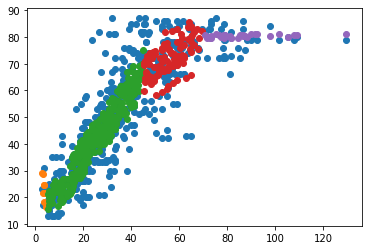

R2  0.7080545121227351
MAE of simple linear regression 8.825996481898637
MSE of simple linear regression 130.6742427484967
RMSE of simple linear regression 11.431283512733673
R2  0.82362115603964
MAE of simple linear regression 6.417434869739479
MSE of simple linear regression 78.94683366733467
RMSE of simple linear regression 8.88520307406278


<ipython-input-113-a1ad8cb59b87>:68: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(train_x, train_y)


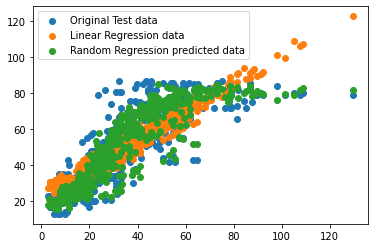

In [113]:
train_x = train[['PM2.5_2', 'RH_2']]
train_y = train[['cpcb_pm25']]
test_x = test[['PM2.5_2', 'RH_2']]
test_y = test[['cpcb_pm25']]

train_x_1 = train_1[['PM2.5_2', 'RH_2']]
train_y_1 = train_1[['cpcb_pm25']]
train_x_2 = train_2[['PM2.5_2', 'RH_2']]
train_y_2 = train_2[['cpcb_pm25']]
train_x_3 = train_3[['PM2.5_2', 'RH_2']]
train_y_3 = train_3[['cpcb_pm25']]
train_x_4 = train_4[['PM2.5_2', 'RH_2']]
train_y_4 = train_4[['cpcb_pm25']]

test_x_1 = test_1[['PM2.5_2', 'RH_2']]
test_y_1 = test_1[['cpcb_pm25']]
test_x_2 = test_2[['PM2.5_2', 'RH_2']]
test_y_2 = test_2[['cpcb_pm25']]
test_x_3 = test_3[['PM2.5_2', 'RH_2']]
test_y_3 = test_3[['cpcb_pm25']]
test_x_4 = test_4[['PM2.5_2', 'RH_2']]
test_y_4 = test_4[['cpcb_pm25']]
print("****************** <5 ******************* ")
regr_1 = linear_model.LinearRegression()
regr_1.fit (train_x_1, train_y_1)
test_y_hat_1 = regr_1.predict(test_x_1)
metrics_print(test_y_1, test_y_hat_1)

print("****************** <45 ******************* ")
regr_2 = linear_model.LinearRegression()
regr_2.fit (train_x_2, train_y_2)
test_y_hat_2 = regr_2.predict(test_x_2)
metrics_print(test_y_2, test_y_hat_2)

print("****************** <70 ******************* ")
regr_3 = linear_model.LinearRegression()
regr_3.fit (train_x_3, train_y_3)
test_y_hat_3 = regr_3.predict(test_x_3)
metrics_print(test_y_3, test_y_hat_3)

print("****************** >70 ******************* ")
regr_4 = linear_model.LinearRegression()
regr_4.fit (train_x_4, train_y_4)
test_y_hat_4 = regr_4.predict(test_x_4)
metrics_print(test_y_4, test_y_hat_4)

plt.scatter(test_x['PM2.5_2'], test_y)
plt.scatter(test_x_1['PM2.5_2'], test_y_hat_1)
plt.scatter(test_x_2['PM2.5_2'], test_y_hat_2)
plt.scatter(test_x_3['PM2.5_2'], test_y_hat_3)
plt.scatter(test_x_4['PM2.5_2'], test_y_hat_4)

plt.show()

regr = linear_model.LinearRegression()
regr.fit (train_x, train_y)
test_y_hat = regr.predict(test_x)
metrics_print(test_y, test_y_hat)
Linear_test_x = test_x
Linear_test_y = test_y
Linear_test_y_hat = test_y_hat


from sklearn.metrics import r2_score
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(train_x, train_y) 
y_pred = regressor.predict(test_x)

metrics_print(test_y, y_pred)

Random_test_x = test_x
Random_test_y = test_y
Random_test_y_hat = y_pred

plt.scatter(test_x['PM2.5_2'], test_y)
plt.scatter(Linear_test_x['PM2.5_2'], Linear_test_y_hat)
plt.scatter(Random_test_x['PM2.5_2'], Random_test_y_hat)

plt.legend(["Original Test data","Linear Regression data", "Random Regression predicted data"])


****************** <5 ******************* 
R2  -1.0265726589194184
MAE of simple linear regression 5.60235309767688
MSE of simple linear regression 44.58459849622721
RMSE of simple linear regression 6.677169946633619
****************** <45 ******************* 
R2  0.6800516418122153
MAE of simple linear regression 7.119383300414191
MSE of simple linear regression 94.41191376994297
RMSE of simple linear regression 9.716579324533042
****************** <70 ******************* 
R2  0.2784194245439279
MAE of simple linear regression 7.491349683578885
MSE of simple linear regression 91.30140956985733
RMSE of simple linear regression 9.555177108241235
****************** >70 ******************* 
R2  -0.059833041133176
MAE of simple linear regression 4.191540274771187
MSE of simple linear regression 26.899222687584246
RMSE of simple linear regression 5.186446055593777


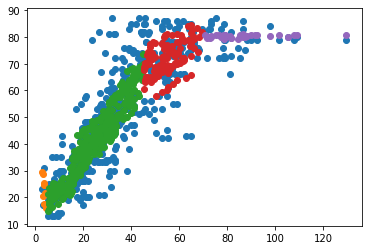

R2  0.7159676703443383
MAE of simple linear regression 8.655806878836353
MSE of simple linear regression 127.13232824289636
RMSE of simple linear regression 11.27529725740729
R2  0.8544216728738623
MAE of simple linear regression 5.868336673346694
MSE of simple linear regression 65.16058116232465
RMSE of simple linear regression 8.072210426043455


<ipython-input-114-79ee163335a5>:69: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(train_x, train_y)


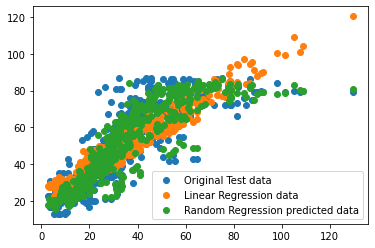

In [114]:
train_x = train[['PM2.5_2', 'RH_2', 'Temp_2']]
train_y = train[['cpcb_pm25']]
test_x = test[['PM2.5_2', 'RH_2', 'Temp_2']]
test_y = test[['cpcb_pm25']]

train_x_1 = train_1[['PM2.5_2', 'RH_2', 'Temp_2']]
train_y_1 = train_1[['cpcb_pm25']]
train_x_2 = train_2[['PM2.5_2', 'RH_2', 'Temp_2']]
train_y_2 = train_2[['cpcb_pm25']]
train_x_3 = train_3[['PM2.5_2', 'RH_2', 'Temp_2']]
train_y_3 = train_3[['cpcb_pm25']]
train_x_4 = train_4[['PM2.5_2', 'RH_2', 'Temp_2']]
train_y_4 = train_4[['cpcb_pm25']]

test_x_1 = test_1[['PM2.5_2', 'RH_2', 'Temp_2']]
test_y_1 = test_1[['cpcb_pm25']]
test_x_2 = test_2[['PM2.5_2', 'RH_2', 'Temp_2']]
test_y_2 = test_2[['cpcb_pm25']]
test_x_3 = test_3[['PM2.5_2', 'RH_2', 'Temp_2']]
test_y_3 = test_3[['cpcb_pm25']]
test_x_4 = test_4[['PM2.5_2', 'RH_2', 'Temp_2']]
test_y_4 = test_4[['cpcb_pm25']]
print("****************** <5 ******************* ")
regr_1 = linear_model.LinearRegression()
regr_1.fit (train_x_1, train_y_1)
test_y_hat_1 = regr_1.predict(test_x_1)
metrics_print(test_y_1, test_y_hat_1)

print("****************** <45 ******************* ")
regr_2 = linear_model.LinearRegression()
regr_2.fit (train_x_2, train_y_2)
test_y_hat_2 = regr_2.predict(test_x_2)
metrics_print(test_y_2, test_y_hat_2)

print("****************** <70 ******************* ")
regr_3 = linear_model.LinearRegression()
regr_3.fit (train_x_3, train_y_3)
test_y_hat_3 = regr_3.predict(test_x_3)
metrics_print(test_y_3, test_y_hat_3)

print("****************** >70 ******************* ")
regr_4 = linear_model.LinearRegression()
regr_4.fit (train_x_4, train_y_4)
test_y_hat_4 = regr_4.predict(test_x_4)
metrics_print(test_y_4, test_y_hat_4)

plt.scatter(test_x['PM2.5_2'], test_y)
plt.scatter(test_x_1['PM2.5_2'], test_y_hat_1)
plt.scatter(test_x_2['PM2.5_2'], test_y_hat_2)
plt.scatter(test_x_3['PM2.5_2'], test_y_hat_3)
plt.scatter(test_x_4['PM2.5_2'], test_y_hat_4)


plt.show()

regr = linear_model.LinearRegression()
regr.fit (train_x, train_y)
test_y_hat = regr.predict(test_x)
metrics_print(test_y, test_y_hat)
Linear_test_x = test_x
Linear_test_y = test_y
Linear_test_y_hat = test_y_hat


from sklearn.metrics import r2_score
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(train_x, train_y) 
y_pred = regressor.predict(test_x)

metrics_print(test_y, y_pred)

Random_test_x = test_x
Random_test_y = test_y
Random_test_y_hat = y_pred

plt.scatter(test_x['PM2.5_2'], test_y)
plt.scatter(Linear_test_x['PM2.5_2'], Linear_test_y_hat)
plt.scatter(Random_test_x['PM2.5_2'], Random_test_y_hat)

plt.legend(["Original Test data","Linear Regression data", "Random Regression predicted data"])

